In [ ]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

In [ ]:
#data_set = r"C:\Users\A\Desktop\neural networks\WESAD-data\S2"
s2_path = "/content/drive/MyDrive/PhD research/Stress Detection/Stress Detection/WESAD/WESAD/S7/S7.pkl"

with open(s2_path, 'rb') as f:
    s2_data = pickle.load(f, encoding='latin1')

In [ ]:
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

print("Done")

Done


In [ ]:
numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index')
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"])

print("data frame combined")

data frame combined


In [ ]:
df

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
0,1.0696,-0.0140,1.4612,-0.019226,-0.048843,12.506866,33.993530,1.832581,0.0
1,1.0654,-0.0102,1.4222,-0.016937,-0.007004,12.468719,33.932678,1.835632,0.0
2,1.0654,0.0042,1.3202,-0.016159,0.071777,12.506866,33.970703,1.856995,0.0
3,1.0666,0.0202,1.1464,-0.012405,0.088486,12.506485,34.008759,1.829529,0.0
4,1.0602,0.0310,0.9192,-0.020325,0.090271,12.504959,33.887085,1.817322,0.0
...,...,...,...,...,...,...,...,...,...
3666595,0.8586,-0.0958,-0.0390,0.156418,-0.036942,13.085556,34.917084,0.813293,0.0
3666596,0.8526,-0.1026,-0.0430,0.115723,0.098831,13.089371,34.935608,0.816345,0.0
3666597,0.8466,-0.1082,-0.0574,0.086380,0.199768,13.090134,34.943298,0.804138,0.0
3666598,0.8422,-0.1138,-0.0814,0.139938,0.227646,13.081360,34.940247,0.834656,0.0


In [ ]:
df['w_label'].describe()

count    3.666600e+06
mean     1.456092e+00
std      1.638329e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      7.000000e+00
Name: w_label, dtype: float64

<Axes: >

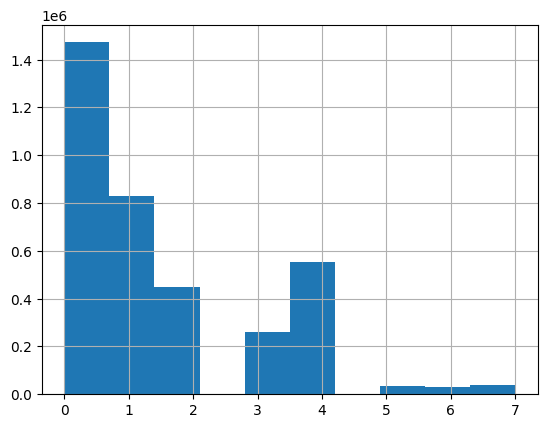

In [ ]:
df['w_label'].hist()

In [ ]:
#mean normalization
norm_df_out=(df-df.mean())/df.std()
norm_df_out.head()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
0,4.795654,0.747977,9.398798,-0.075335,-2.683750,-0.423096,-2.888692,0.483777,-0.888767
1,4.686491,0.860003,9.176366,-0.066936,-0.285429,-0.434823,-3.132119,0.484608,-0.888767
2,4.686491,1.284527,8.594620,-0.064081,4.230446,-0.423096,-2.980007,0.490428,-0.888767
3,4.717684,1.756222,7.603370,-0.050306,5.188199,-0.423214,-2.827774,0.482945,-0.888767
4,4.551347,2.074615,6.307560,-0.079367,5.290535,-0.423683,-3.314506,0.479619,-0.888767


In [ ]:
norm_df_out.describe()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,3.666600e+06,3.666600e+06,3.666600e+06,3.666600e+06,3.666600e+06,3.666600e+06,3.666600e+06,3.666600e+06,3.666600e+06
mean,-1.100219e-15,-5.097397e-17,2.786670e-17,-5.836892e-18,-1.682079e-17,-3.325090e-16,-5.529002e-16,-1.922376e-17,-1.371708e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.325683e+01,-1.717636e+01,-1.853527e+01,-4.277674e+00,-3.028280e+01,-8.915864e-01,-3.496893e+00,-1.099600e+01,-8.887669e-01
25%,-8.545187e-01,-5.196980e-01,-9.072302e-01,-3.073148e-01,-4.323723e-01,-7.143928e-01,-7.684090e-01,-5.559088e-01,-8.887669e-01
50%,4.033830e-01,1.170881e-01,3.497007e-02,-1.174982e-01,-7.287048e-03,-4.902916e-01,-9.318547e-02,-7.576625e-02,-2.783888e-01
75%,6.424911e-01,5.534029e-01,4.159566e-01,1.529485e-01,4.387901e-01,4.532553e-01,8.366966e-01,5.918606e-01,3.319894e-01
max,2.369020e+01,1.536457e+01,1.536340e+01,5.497715e+00,3.214175e+01,2.621560e+00,2.631148e+00,9.000799e+00,3.383880e+00


In [ ]:
norm_df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3666600 entries, 0 to 3666599
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   c_ax     float64
 1   c_ay     float64
 2   c_az     float64
 3   c_ecg    float64
 4   c_emg    float64
 5   c_eda    float64
 6   c_temp   float64
 7   c_resp   float64
 8   w_label  float64
dtypes: float64(9)
memory usage: 251.8 MB


<Axes: >

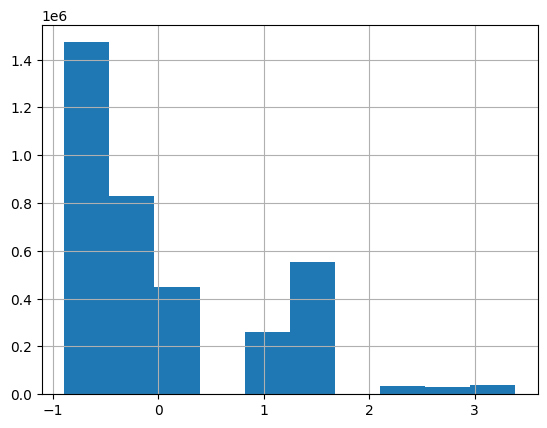

In [ ]:
norm_df_out['w_label'].hist()

<Axes: >

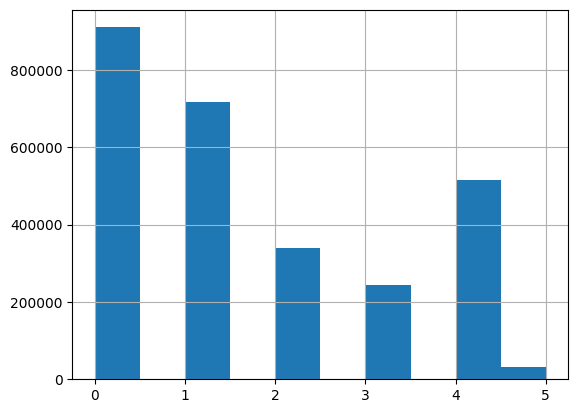

In [ ]:
df_out['w_label'].hist()

In [ ]:
#mean normalization
norm_df_out=(df_out-df_out.mean())/df_out.std()
#min-max normalization:
#norm_df_out=(df_out-df_out.min())/(df_out.max()-df_out.min())

norm_y = df_out.w_label #keep original labels Dont normalize labels
norm_x = norm_df_out.drop('w_label',axis=1)


norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

LDA + Normalization + n_components & 5 Cross Validation

<Axes: >

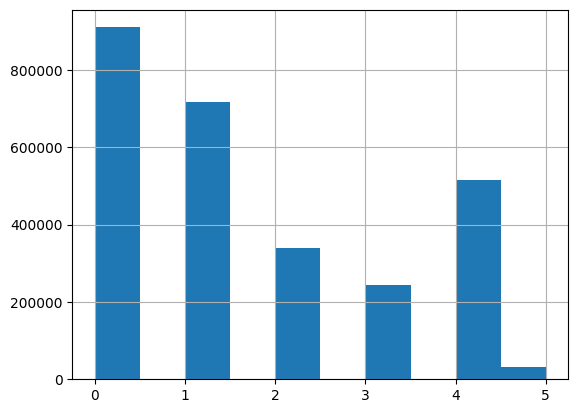

In [ ]:
df_out.w_label.hist()

In [ ]:
LDA= LinearDiscriminantAnalysis(solver = 'svd')
y_out = LDA.fit(norm_x_train, norm_y_train).predict(norm_x_test)
#confusion_matrix(y_test, y_out)
print(classification_report(norm_y_test, y_out, digits=6))

              precision    recall  f1-score   support

         0.0   0.893736  0.555136  0.684871    182350
         1.0   0.807094  0.992913  0.890412    143077
         2.0   0.679488  0.839076  0.750896     68256
         3.0   0.906030  0.977281  0.940308     48461
         4.0   0.831061  0.999709  0.907617    102922
         5.0   0.029005  0.007212  0.011552      6101

    accuracy                       0.818010    551167
   macro avg   0.691069  0.728554  0.697609    551167
weighted avg   0.824518  0.818010  0.803004    551167

